### Vaishna Subbaiah
#### 12/9/25
###### Final Project - Milestone #4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_imports.csv")

### Question 1
##### 1. How have U.S. import prices changed from 2015 to 2024?

C:\Users\Vaish\AppData\Local\Temp\ipykernel_14676\3800699375.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()


--- Question 1 Analysis: Annual Average Import Prices (2015-2024) ---

Annual Average Import Price Index Values:
|   Year |   Value |
|-------:|--------:|
|   2015 | 123.925 |
|   2016 | 119.8   |
|   2017 | 123.275 |
|   2018 | 127.133 |
|   2019 | 125.517 |
|   2020 | 122.383 |
|   2021 | 133.208 |
|   2022 | 144.492 |
|   2023 | 140.017 |
|   2024 | 141.025 |


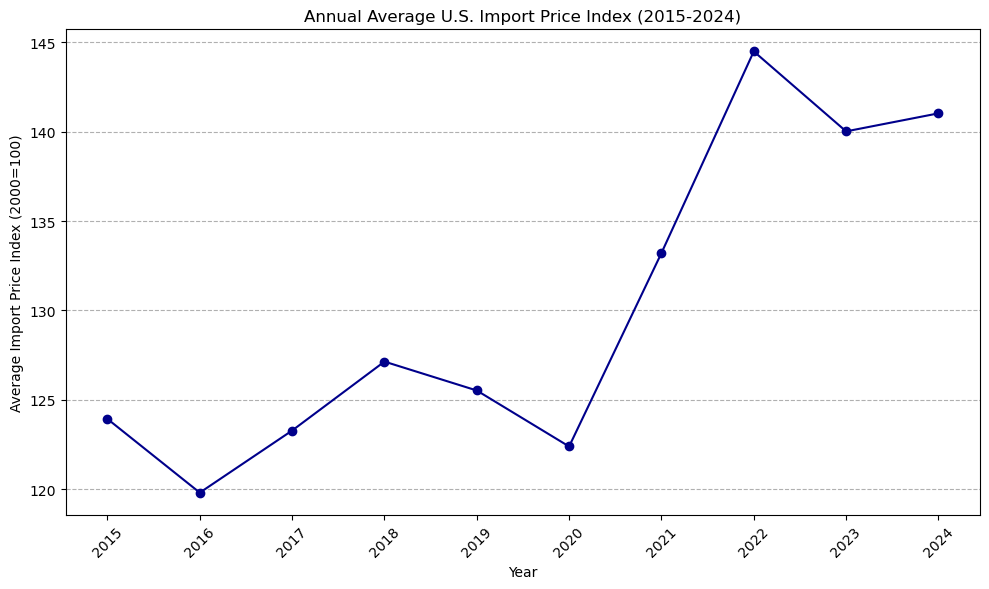

In [4]:
# data prep for analysis ---

# create a proper date column from 'year' and 'month' columns
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')

# restrict data to the required range (2015-2024)
df = df[df['Date'].dt.year.between(2015, 2024)]
df_clean_indexed = df.set_index('Date')

# calculate annual average (the average of all months in each year)
# we use 'value' column from the cleaned data
df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()
df_annual_avg['Year'] = df_annual_avg.index.year.astype(str)
df_annual_avg = df_annual_avg.rename(columns={'value': 'Value'}) 


# print average and generate graph

print("--- Question 1 Analysis: Annual Average Import Prices (2015-2024) ---")

# print the annual average values
print("\nAnnual Average Import Price Index Values:")
print(df_annual_avg[['Year', 'Value']].to_markdown(index=False))

# generating line plot
plt.figure(figsize=(10, 6))
plt.plot(df_annual_avg['Year'], df_annual_avg['Value'], marker='o', color='darkblue')
plt.title('Annual Average U.S. Import Price Index (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Average Import Price Index (2000=100)')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 2
##### 2. Which years experienced the biggest price swings(largest overall size of price changes) for U.S. imported goods?

C:\Users\Vaish\AppData\Local\Temp\ipykernel_14676\1952914861.py:6: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()


--- Analysis: Absolute Annual Change in Import Prices (2016-2024) ---
To avoid bars going below the X-axis, I plotted the absolute value of the Year-over-Year percentage change, which measures the size of the price change. A taller bar means the price index had a bigger annual swing, regardless of whether that swing was an increase or a decrease. This emphasizes how much prices moved annually, rather than their specific direction.

Absolute YoY Percentage Change Values:
|   Year |   Abs_YoY_Change |
|-------:|-----------------:|
|   2016 |             3.33 |
|   2017 |             2.90 |
|   2018 |             3.13 |
|   2019 |             1.27 |
|   2020 |             2.50 |
|   2021 |             8.85 |
|   2022 |             8.47 |
|   2023 |             3.10 |
|   2024 |             0.72 |
The year 2021 had the highest Year-over-Year (YoY) increase, with a change of 8.85%.


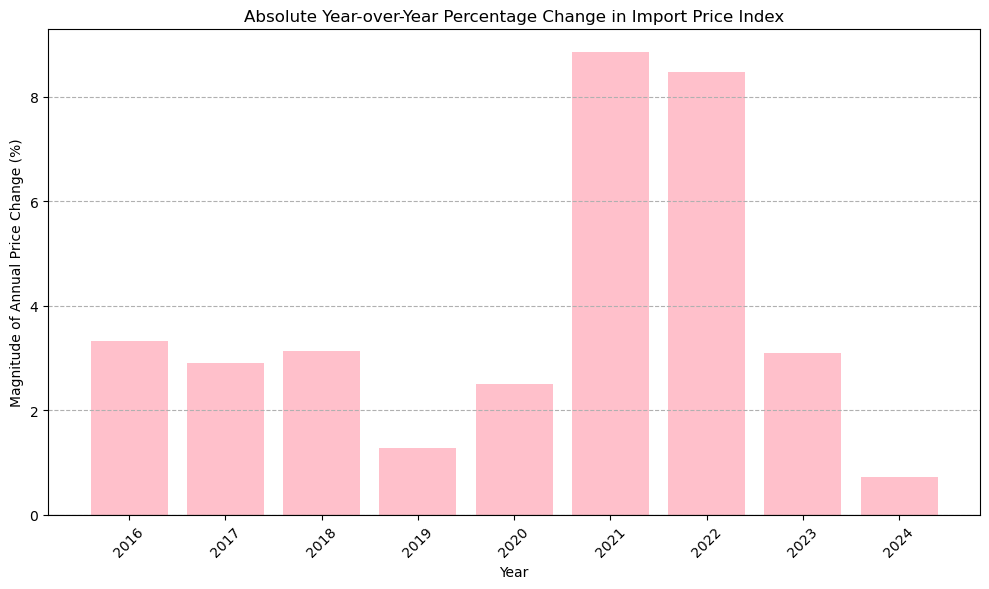

In [12]:
# data preparation and calculation
df['Date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')
df = df[df['Date'].dt.year.between(2015, 2024)]
df_clean_indexed = df.set_index('Date')

df_annual_avg = df_clean_indexed['value'].resample('Y').mean().to_frame()
df_annual_avg = df_annual_avg.rename(columns={'value': 'Value'}) 

# calculate absolute year-over-year percentage change
df_annual_avg['YoY_Change'] = df_annual_avg['Value'].pct_change() * 100
df_annual_avg['Abs_YoY_Change'] = df_annual_avg['YoY_Change'].abs()
df_annual_avg.dropna(inplace=True) 

# create the 'Year' column from the index
df_annual_avg['Year'] = df_annual_avg.index.year.astype(str)

# prepare data for plotting
years = df_annual_avg['Year']
abs_yoy_values = df_annual_avg['Abs_YoY_Change']

# printing analysis and generating bar graph (using absolute values) 
print("--- Analysis: Absolute Annual Change in Import Prices (2016-2024) ---")
print("To avoid bars going below the X-axis, I plotted the absolute value of the Year-over-Year percentage change, which measures the size of the price change. A taller bar means the price index had a bigger annual swing, regardless of whether that swing was an increase or a decrease. This emphasizes how much prices moved annually, rather than their specific direction.")

print("\nAbsolute YoY Percentage Change Values:")
print(df_annual_avg[['Year', 'Abs_YoY_Change']].to_markdown(index=False, floatfmt=".2f"))
print("The year 2021 had the highest Year-over-Year (YoY) increase, with a change of 8.85%.")


# generating the bar plot using only positive values
plt.figure(figsize=(10, 6))
plt.bar(years, abs_yoy_values, color='pink') 
plt.title('Absolute Year-over-Year Percentage Change in Import Price Index')
plt.xlabel('Year')
plt.ylabel('Magnitude of Annual Price Change (%)')
plt.grid(axis='y', linestyle='--')
plt.axhline(0, color='black', linewidth=0.8) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()